# Data Wrangling & Analyzing WeRateDogs (@dog_rates)

by Omar Soliman

In [1]:
#import packages and libraries

import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather

### Provided Twitter Archive File

In [2]:
#Read in the Twitter archive
#Set as dataframe 'twitter_archive'

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Downloaded Image File

In [4]:
#Download the dog image prediction files using the Request library via URL

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
#Read the dog image prediction .tsv file
#Set as dataframe 'dip'

dog_image = pd.read_csv('image-predictions.tsv', sep='\t' )

### Twitter API

In [5]:
#Keys and Tokens

api_key = ""
api_secret_key = ""
access_token = ""
access_token_secret = "" 

In [6]:
#Authentication

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [7]:
# List of tweets

tw_list = []

# List of Exceptions

ex_list = []

# For loop to add each matched tweet json to tw_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # How many favorites the tweet had
        retweets = tweet['retweet_count'] # Count of the retweet
        user_followers = tweet['user']['followers_count'] # How many followers the user had
        user_favourites = tweet['user']['favourites_count'] # How many favorites the user had
        date_time = tweet['created_at'] # The date and time of the creation
        
        tw_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        ex_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
770743923962707968 _ [{'code

Rate limit reached. Sleeping for: 400


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 535


In [9]:
# length of the result
print("Number of Results", len(tw_list))

# length of the errors
print("Number of Errors", len(ex_list))

Number of Results 2342
Number of Errors 14


In [10]:

print("The length of the result", len(tw_list))

The length of the result 2342


In [11]:
# Create DataFrames from json
json_tweets = pd.DataFrame(tw_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [6]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

## Assess

#### Twitter Archive Data

In [7]:
# random sample data twitter_archive

twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2299,667065535570550784,NaN,NaN,2015-11-18 19:43:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Hufflepuff. Loves vest. Eyes wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667065535...,8,10,None,None,None,None,None
633,793845145112371200,NaN,NaN,2016-11-02 16:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He was just caught wearing pant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145...,13,10,Clark,None,None,None,None
1170,720775346191278080,NaN,NaN,2016-04-15 00:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Berkeley. He's in a predicament. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720775346...,10,10,Berkeley,None,None,None,None
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carper. He's a Tortellini Angiosperm. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305...,11,10,Carper,None,None,None,None
1961,673359818736984064,NaN,NaN,2015-12-06 04:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steve. He was just relaxing in hot tub...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673359818...,8,10,Steve,None,None,None,None
1851,675710890956750848,NaN,NaN,2015-12-12 16:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He was just told that he couldn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675710890...,12,10,Lenny,None,None,None,None
1285,708469915515297792,NaN,NaN,2016-03-12 01:49:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobble. He's a Croatian Galifianakis. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708469915...,11,10,Bobble,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
534,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
1144,727286334147182592,NaN,NaN,2016-05-02 23:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I swear to god if we get sent another Blue Mad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727286334...,9,10,None,None,None,None,None


In [8]:
# twitter_archive info

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Dog Image Prediction Files Data

In [9]:
# random dog_image sample data

dog_image.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
710,685307451701334016,https://pbs.twimg.com/media/CYKzfTTWMAEeTN7.jpg,1,Pomeranian,0.963176,True,Shetland_sheepdog,0.019468,True,keeshond,0.008605,True
1036,711968124745228288,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,0.088391,False
116,668113020489474048,https://pbs.twimg.com/media/CUWdPsqWcAERQVv.jpg,1,Pembroke,0.548896,True,Cardigan,0.191101,True,collie,0.059814,True
754,688211956440801280,https://pbs.twimg.com/ext_tw_video_thumb/68821...,1,bannister,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False
1160,734776360183431168,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,1,Siberian_husky,0.304902,True,Eskimo_dog,0.155147,True,malamute,0.050942,True
749,687818504314159109,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,1,Lakeland_terrier,0.873029,True,soft-coated_wheaten_terrier,0.060924,True,toy_poodle,0.017031,True
1262,748977405889503236,https://pbs.twimg.com/media/CmTm-XQXEAAEyN6.jpg,1,German_short-haired_pointer,0.742216,True,bluetick,0.152810,True,English_setter,0.051835,True
1772,827933404142436356,https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg,2,German_shepherd,0.806115,True,Tibetan_mastiff,0.104831,True,kelpie,0.038148,True
846,695314793360662529,https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg,2,Maltese_dog,0.678547,True,Lhasa,0.125046,True,Pekinese,0.048999,True


In [10]:
# dog_image info

dog_image.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### API Tweet Data

In [11]:
# random tweet_data sample data 

tweet_data.sample(25)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
1028,743895849529389061,3840,1029,7434184,139632,2016-06-17 19:59:26
614,795400264262053889,10887,3169,7434164,139632,2016-11-06 22:59:35
1236,711008018775851008,3145,663,7434185,139632,2016-03-19 01:54:56
665,789314372632018944,9263,2545,7434165,139632,2016-10-21 03:56:25
1164,719551379208073216,5298,2056,7434185,139632,2016-04-11 15:43:12
512,809808892968534016,0,5407,7434163,139632,2016-12-16 17:14:20
2157,669328503091937280,1031,431,7434129,139632,2015-11-25 01:35:25
541,804475857670639616,6608,2220,7434164,139632,2016-12-02 00:02:45
2109,670385711116361728,575,220,7434128,139632,2015-11-27 23:36:23
625,793500921481273345,11520,2632,7434164,139632,2016-11-01 17:12:16


In [12]:
# tweet_data info

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2342 non-null   int64 
 1   favorites        2342 non-null   int64 
 2   retweets         2342 non-null   int64 
 3   user_followers   2342 non-null   int64 
 4   user_favourites  2342 non-null   int64 
 5   date_time        2342 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.9+ KB


## Quality Issues



### Twitter Archive Dataset

* Remove retweets to keep only original ratings with images.

* Remove superfluous rows and columns.

* Datatype conversion in_reply_to_status_id to string

* Datatype conversion in_reply_to_user_id to string

* Datatype conversion retweeted_status_id to string

* Datatype conversion retweeted_status_user_id to string

* The numerator and denominator columns have invalid values.

* Need to Convert Null Values


### Image Prediction Files Dataset

* Drop duplicates

* Remove superfluous columns

### API Tweet Data

* Keep the original tweets only


### Tidiness Issues

* The three data sets need to be merged

* Need to melt the doggo, floofer, pupper and puppo twitter archive columns into a single 'stage' column

## Cleaning the Data

In [14]:
# Copy the dataframes 

ta_clean = twitter_archive.copy()
dip_clean = dog_image.copy()
tweet_data_clean = tweet_data.copy()

#### Define 
The three data sets need to be merged

#### Code

In [15]:
# merge dip into ta table

ta_clean = pd.merge(left=ta_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [16]:
# merge tweet_data into ta table

ta_clean = ta_clean.merge(dip_clean, on='tweet_id', how='inner')


#### Test

In [17]:
# test merge

ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2068 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2068 non-null   object 
 4   source                      2068 non-null   object 
 5   text                        2068 non-null   object 
 6   retweeted_status_id         75 non-null     float64
 7   retweeted_status_user_id    75 non-null     float64
 8   retweeted_status_timestamp  75 non-null     object 
 9   expanded_urls               2068 non-null   object 
 10  rating_numerator            2068 non-null   int64  
 11  rating_denominator          2068 non-null   int64  
 12  name                        2068 non-null   object 
 13  doggo                       2068 

#### Define

Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column: 'dog_stage'

#### Code

In [18]:
# Select melt and stay columns

MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in ta_clean.columns.tolist() if x not in MELTS_COLUMNS]



In [19]:
# Melt the columns

ta_clean = pd.melt(ta_clean, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')


In [20]:
# Drop superfluous column

ta_clean = ta_clean.drop('stages', 1)

#### Test

In [21]:
# test

print('Value Counts' + '\n')
print(ta_clean.dog_stage.value_counts())

Value Counts

None       7938
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64


#### Define

Remove superfluous rows and columns

#### Code

In [22]:
# Delete the retweets
ta_clean = ta_clean[pd.isnull(ta_clean.retweeted_status_id)]

# Delete duplicated tweet_id
ta_clean = ta_clean.drop_duplicates()

# Delete tweets with no pictures
ta_clean = ta_clean.dropna(subset = ['jpg_url'])

# Delete columns related to retweet we don't need anymore
ta_clean = ta_clean.drop('retweeted_status_id', 1)
ta_clean = ta_clean.drop('retweeted_status_user_id', 1)
ta_clean = ta_clean.drop('retweeted_status_timestamp', 1)

# Delete column date_time we imported from the API, it has the same values as timestamp column
ta_clean = ta_clean.drop('date_time', 1)

# Convert timestamp to datetime
ta_clean['timestamp'] = pd.to_datetime(ta_clean['timestamp'])

# Extract year, month and day to new columns
ta_clean['year'] = ta_clean['timestamp'].dt.year
ta_clean['month'] = ta_clean['timestamp'].dt.month
ta_clean['day'] = ta_clean['timestamp'].dt.day

# Finally drop timestamp column
ta_clean = ta_clean.drop('timestamp', 1)


#### Test

In [23]:
list(ta_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'year',
 'month',
 'day']

#### Define

Correct Numerators

#### Code

In [24]:

# Correct

ta_clean[['rating_numerator', 'rating_denominator']] = ta_clean[['rating_numerator','rating_denominator']].astype(float)

ta_clean.info()

#First change numerator and denominators type int to float to allow decimals 
ta_clean[['rating_numerator', 'rating_denominator']] = ta_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

ta_clean.loc[(ta_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
ta_clean.loc[(ta_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
ta_clean.loc[(ta_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
ta_clean.loc[(ta_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
ta_clean.loc[(ta_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310 entries, 0 to 7088
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2310 non-null   int64  
 1   in_reply_to_status_id  27 non-null     float64
 2   in_reply_to_user_id    27 non-null     float64
 3   source                 2310 non-null   object 
 4   text                   2310 non-null   object 
 5   expanded_urls          2310 non-null   object 
 6   rating_numerator       2310 non-null   float64
 7   rating_denominator     2310 non-null   float64
 8   name                   2310 non-null   object 
 9   favorites              2310 non-null   int64  
 10  retweets               2310 non-null   int64  
 11  user_followers         2310 non-null   int64  
 12  user_favourites        2310 non-null   int64  
 13  jpg_url                2310 non-null   object 
 14  img_num                2310 non-null   int64  
 15  p1  

#### Test

In [25]:
with pd.option_context('max_colwidth', 200):
    display(ta_clean[ta_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
553,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
609,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1446,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
4745,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


#### Define 

Correct Denominators

In [26]:
# Update both numerators and denominators: 

# Tweets with denominator not equal to 10 
ta_clean.loc[(ta_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
ta_clean.loc[(ta_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

ta_clean.loc[(ta_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
ta_clean.loc[(ta_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

ta_clean.loc[(ta_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
ta_clean.loc[(ta_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

ta_clean.loc[(ta_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
ta_clean.loc[(ta_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

ta_clean.loc[(ta_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
ta_clean.loc[(ta_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

# Tweets with no actual ratings
ta_clean = ta_clean[ta_clean['tweet_id'] != 832088576586297345]
ta_clean = ta_clean[ta_clean['tweet_id'] != 810984652412424192]
ta_clean = ta_clean[ta_clean['tweet_id'] != 682808988178739200]
ta_clean = ta_clean[ta_clean['tweet_id'] != 835246439529840640]
ta_clean = ta_clean[ta_clean['tweet_id'] != 686035780142297088]



#### Test

In [27]:
# Only the group dogs cleaned
with pd.option_context('max_colwidth', 200):
    display(ta_clean[ta_clean['rating_denominator'] != 10][['tweet_id',
                                                            'text',
                                                            'rating_numerator',
                                                            'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
341,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
730,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
919,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1017,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1042,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1060,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1126,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1202,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1374,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1375,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


#### Define

Create New Rating Column

#### Code

In [28]:
# Create a new column with rating in float type to avoid converting all int column to float
ta_clean['rating'] = 10 * ta_clean['rating_numerator'] / ta_clean['rating_denominator'].astype(float)


#### Test

In [29]:

ta_clean.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,year,month,day,rating
1174,699423671849451520,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","""Don't ever talk to me or my son again."" ...bo...",https://twitter.com/dog_rates/status/699423671...,10.0,10.0,None,1447,...,0.001825,True,bull_mastiff,0.000299,True,None,2016,2,16,10.0
1374,684225744407494656,6.842229e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143.0,130.0,None,1307,...,0.067958,True,Great_Pyrenees,0.065327,True,None,2016,1,5,11.0
550,787397959788929025,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,https://twitter.com/dog_rates/status/787397959...,11.0,10.0,Moose,11666,...,0.021084,True,miniature_pinscher,0.019484,True,None,2016,10,15,11.0
5378,693262851218264065,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,https://twitter.com/dog_rates/status/693262851...,11.0,10.0,None,2353,...,0.007946,True,kuvasz,0.000749,True,pupper,2016,1,30,11.0
1887,669327207240699904,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Just got home from college. Dis my dog. She do...,https://twitter.com/dog_rates/status/669327207...,13.0,10.0,None,585,...,0.049669,True,kuvasz,0.010216,True,None,2015,11,25,13.0


#### Define

Drop duped jpg_url

#### Code

In [30]:
#CODE: Delete duplicated jpg_url
ta_clean = ta_clean.drop_duplicates(subset=['jpg_url'], keep='last')


#### Test

In [31]:
sum(ta_clean['jpg_url'].duplicated())

0

#### Define

Create column for the image prediction and column for the confidence level

#### Code

In [32]:
# The first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

# Create a function with nested if to capture the dog type and confidence level
# From the first 'true' prediction
def image(ta_clean):
    if ta_clean['p1_dog'] == True:
        dog_type.append(ta_clean['p1'])
        confidence_list.append(ta_clean['p1_conf'])
    elif ta_clean['p2_dog'] == True:
        dog_type.append(ta_clean['p2'])
        confidence_list.append(ta_clean['p2_conf'])
    elif ta_clean['p3_dog'] == True:
        dog_type.append(ta_clean['p3'])
        confidence_list.append(ta_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

# Series objects having index the image_prediction_clean column.        
ta_clean.apply(image, axis=1)

# Create new columns
ta_clean['dog_type'] = dog_type
ta_clean['confidence_list'] = confidence_list

# Drop rows that have prediction_list 'error'
ta_clean = ta_clean[ta_clean['dog_type'] != 'Error']


#### Test

In [33]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 7088
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1684 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   source                 1684 non-null   object 
 4   text                   1684 non-null   object 
 5   expanded_urls          1684 non-null   object 
 6   rating_numerator       1684 non-null   float64
 7   rating_denominator     1684 non-null   float64
 8   name                   1684 non-null   object 
 9   favorites              1684 non-null   int64  
 10  retweets               1684 non-null   int64  
 11  user_followers         1684 non-null   int64  
 12  user_favourites        1684 non-null   int64  
 13  jpg_url                1684 non-null   object 
 14  img_num                1684 non-null   int64  
 15  p1  

#### Define 

Delete superfuous image columns


#### Code

In [34]:
# Delete columns

ta_clean = ta_clean.drop(['img_num', 'p1', 'in_reply_to_status_id',
                         'in_reply_to_user_id', 'expanded_urls',
                            'p1_conf', 'p1_dog', 
                            'p2', 'p2_conf', 
                            'p2_dog', 'p3', 
                            'p3_conf', 
                            'p3_dog'], 1)

#### Test

In [35]:
list(ta_clean)

['tweet_id',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'dog_stage',
 'year',
 'month',
 'day',
 'rating',
 'dog_type',
 'confidence_list']

#### Define

Change tweet_id from str to int

#### Code

In [36]:
# Change tweet_id from str to int
ta_clean['tweet_id'] = ta_clean['tweet_id'].astype(int)


#### Test

In [37]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 7088
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1684 non-null   int32  
 1   source              1684 non-null   object 
 2   text                1684 non-null   object 
 3   rating_numerator    1684 non-null   float64
 4   rating_denominator  1684 non-null   float64
 5   name                1684 non-null   object 
 6   favorites           1684 non-null   int64  
 7   retweets            1684 non-null   int64  
 8   user_followers      1684 non-null   int64  
 9   user_favourites     1684 non-null   int64  
 10  jpg_url             1684 non-null   object 
 11  dog_stage           1684 non-null   object 
 12  year                1684 non-null   int64  
 13  month               1684 non-null   int64  
 14  day                 1684 non-null   int64  
 15  rating              1684 non-null   float64
 16  dog_ty

## Store, Analyze, and Visualize Master Data

In [38]:
#Store the clean DataFrame in a CSV file
ta_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [39]:
# There is a strong relationship between retweets and favorite counts (0.93). 
# As a tweet gains Favorites, one can expect to see retweets to increase and vice versa.

ta_clean.corr()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,user_favourites,year,month,day,rating
tweet_id,1.000000,-0.003976,-0.007578,0.020885,0.033396,-0.047075,-0.052789,0.006593,-0.012262,-0.038597,0.023477
rating_numerator,-0.003976,1.000000,0.972491,0.063941,0.049535,0.015347,-0.012670,0.110596,-0.083410,-0.006153,0.236466
rating_denominator,-0.007578,0.972491,1.000000,-0.029120,-0.020842,0.010781,-0.007937,-0.002601,-0.039911,0.005020,0.009526
favorites,0.020885,0.063941,-0.029120,1.000000,0.931613,0.022560,0.003126,0.514754,-0.143561,-0.020933,0.406881
retweets,0.033396,0.049535,-0.020842,0.931613,1.000000,0.032485,0.009532,0.316436,-0.079247,-0.037787,0.307838
user_followers,-0.047075,0.015347,0.010781,0.022560,0.032485,1.000000,0.935787,0.119980,-0.214920,0.017712,0.022084
user_favourites,-0.052789,-0.012670,-0.007937,0.003126,0.009532,0.935787,1.000000,-0.030827,0.003924,0.014891,-0.022182
year,0.006593,0.110596,-0.002601,0.514754,0.316436,0.119980,-0.030827,1.000000,-0.705925,-0.090148,0.503803
month,-0.012262,-0.083410,-0.039911,-0.143561,-0.079247,-0.214920,0.003924,-0.705925,1.000000,0.097154,-0.204817
day,-0.038597,-0.006153,0.005020,-0.020933,-0.037787,0.017712,0.014891,-0.090148,0.097154,1.000000,-0.051198


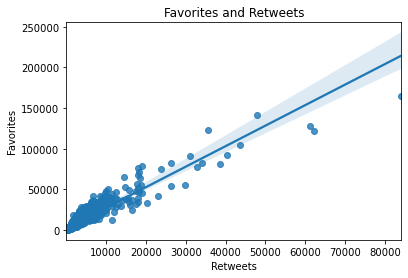

In [41]:
g = sns.regplot(x=ta_clean.retweets, y=ta_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()
fig.savefig('plot01.png')

In [42]:
ta_clean['dog_type'].value_counts()

golden_retriever      157
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
                     ... 
standard_schnauzer      1
Scotch_terrier          1
EntleBucher             1
silky_terrier           1
Irish_wolfhound         1
Name: dog_type, Length: 113, dtype: int64

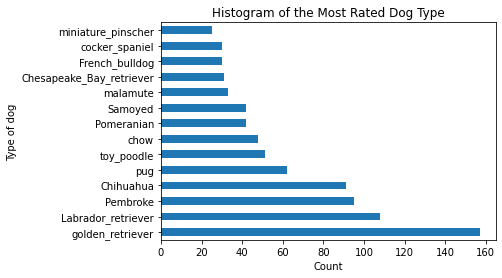

In [44]:
df_dog_type = ta_clean.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('plot02.png',bbox_inches='tight');

In [45]:
df_dog_type_mean = ta_clean.groupby('dog_type').mean()
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,user_favourites,year,month,day,rating
dog_type,,,,,,,,,,,
Afghan_hound,-6.765950e+08,9.666667,10.0,16645.0000,5671.0000,7434164.000,139632.0000,2016.333333,7.666667,11.000000,9.666667
Airedale,2.139754e+08,9.833333,10.0,5089.0000,1322.5000,7434161.000,139632.0000,2015.583333,8.750000,15.916667,9.833333
American_Staffordshire_terrier,-6.273638e+07,10.312500,10.0,9033.9375,2191.6875,7434203.375,139632.0625,2016.187500,5.250000,15.000000,10.312500
Appenzeller,-1.285796e+08,11.000000,10.0,7070.0000,1380.5000,7434172.500,139632.0000,2016.500000,4.500000,18.500000,11.000000
Australian_terrier,-1.579751e+09,11.500000,10.0,10731.5000,2919.5000,7434173.000,139632.0000,2016.500000,3.500000,7.000000,11.500000


In [46]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
soft-coated_wheaten_terrier     8.800000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
                                 ...    
Border_terrier                 12.142857
Tibetan_mastiff                12.250000
briard                         12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating, Length: 113, dtype: float64

In [47]:
df_dog_type_count = ta_clean.groupby('dog_type').count()
df_dog_type_count

,tweet_id,source,text,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,dog_stage,year,month,day,rating,confidence_list
dog_type,,,,,,,,,,,,,,,,,
Afghan_hound,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
toy_terrier,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
vizsla,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [48]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                       9.666667
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
toy_poodle                        11.039216
toy_terrier                       10.333333
vizsla                            10.846154
whippet                           10.181818
wire-haired_fox_terrier           11.500000
Name: rating, Length: 113, dtype: float64

In [49]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,3,9.666667
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
...,...,...
toy_poodle,51,11.039216
toy_terrier,3,10.333333
vizsla,13,10.846154


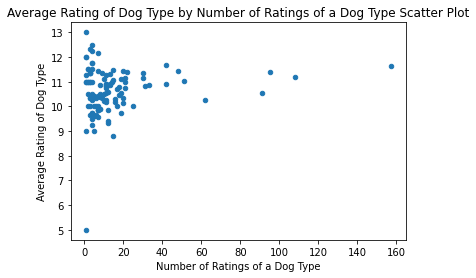

In [50]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('plot03.png',bbox_inches='tight');

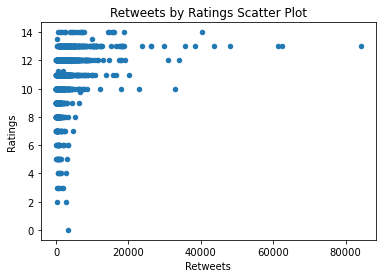

In [51]:
ta_clean.plot(x='retweets', y='rating', kind='scatter')
plt.xlabel('Retweets')
plt.ylabel('Ratings')
plt.title('Retweets by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('plot04.png',bbox_inches='tight');